## Health Care for All Case Study using Pandas

In [915]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Pipeline Controller

hk_df=load_original_data(path="hk_for_all_pre_processed_data/helathcareforall.csv" ) 
hk_df= lower_case_column_names()
hk_df= rename()
hk_df= droping

### Loading Data

In [916]:
def load_original_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.txt', sep = '\t')
    file3 = pd.read_excel('Data/file3.xlsx')
    file4 = pd.read_excel('Data/file4.xlsx')
    return pd.concat([file1,file2,file3, file4], axis=0)

In [917]:
hk_df=load_original_data()

### Make the column names lower case

#### Excercise:



Can you figure out how to use list comprehension and string methods in order to have all the column names in lowercase in the data frame?

In [918]:
def lower_case_column_names(hk_df):
    hk_df.columns=[i.lower() for i in hk_df.columns]
    return hk_df

In [919]:
lower_case_column_names(hk_df)

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


#### Renaming columns

Columns names can be replaced in several ways. 

One of them is to provide a new **list of column names** and replace the value of `df.columns`

Another is to use the method `.rename()` which can be applied to a dataframe. This method needs as an input a **dictionary** in which the old column names are the keys, while the new column names are the values.



#### Excercise:

Can you rename the columns with the names from the variables_description file

In [920]:
def rename_columns(hk_df):
    hk_df.rename(columns={'controln':'id','hv1':'median_home_val', 'ic1':'median_household_income',"ic2":"med_fam_income", "ic3":"avg_household_income","ic4": "avg_fam_income","ic5":"per_capita_income"}, inplace=True )
    return hk_df

In [921]:
rename_columns(hk_df)

,id,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc1,pobc2,med_fam_income,avg_household_income,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714,2,6101,S2,50.0
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769,28,7401,C1,10.0
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667,1,3301,S2,5.0
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000,1,7301,T2,14.0


#### Deleting columns

In [922]:
def drop_columns(hk_df) :
    hk_df.drop(columns=["id","tcode",'pobc1',"dob"], inplace=True)
    return hk_df

In [923]:
drop_columns(hk_df)

,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc2,med_fam_income,avg_household_income,avggift,domain,target_d
0,FL,M,AAA896,392,520.0,7,21975,16,430.0,466,28.000000,C2,100.0
1,IL,M,537.00,365,473.0,0,19387,89,415.0,410,5.666667,T2,7.0
2,FL,F,725.00,301,436.0,3,18837,17,340.0,361,4.111111,C2,5.0
3,NC,M,AAA1095,401,413.0,7,14014,74,407.0,399,27.277778,T2,38.0
4,FL,F,995.00,252,348.0,0,17991,6,280.0,316,6.000000,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,F,742,396,470.0,0,15356,37,424.0,450,14.285714,S2,50.0
1002,FL,M,599,100,423.0,4,11670,27,406.0,200,9.230769,C1,10.0
1003,ND,M,593,258,299.0,0,10186,70,298.0,274,5.266667,S2,5.0
1004,WI,male,564,217,397.0,0,12315,96,386.0,295,11.400000,T2,14.0


In [924]:
hk_df

,state,gender,median_home_val,median_household_income,avg_fam_income,hvp1,per_capita_income,pobc2,med_fam_income,avg_household_income,avggift,domain,target_d
0,FL,M,AAA896,392,520.0,7,21975,16,430.0,466,28.000000,C2,100.0
1,IL,M,537.00,365,473.0,0,19387,89,415.0,410,5.666667,T2,7.0
2,FL,F,725.00,301,436.0,3,18837,17,340.0,361,4.111111,C2,5.0
3,NC,M,AAA1095,401,413.0,7,14014,74,407.0,399,27.277778,T2,38.0
4,FL,F,995.00,252,348.0,0,17991,6,280.0,316,6.000000,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,F,742,396,470.0,0,15356,37,424.0,450,14.285714,S2,50.0
1002,FL,M,599,100,423.0,4,11670,27,406.0,200,9.230769,C1,10.0
1003,ND,M,593,258,299.0,0,10186,70,298.0,274,5.266667,S2,5.0
1004,WI,male,564,217,397.0,0,12315,96,386.0,295,11.400000,T2,14.0


#### Rearanging columns

In [925]:
list(hk_df.columns)

['state',
 'gender',
 'median_home_val',
 'median_household_income',
 'avg_fam_income',
 'hvp1',
 'per_capita_income',
 'pobc2',
 'med_fam_income',
 'avg_household_income',
 'avggift',
 'domain',
 'target_d']

Reordering columns is as simple as replace the dataframe with the new ordering of the columns.

In [926]:
hk_df = hk_df[[
 'state',
 "gender",
 'median_home_val',
 'avg_fam_income',
 'avg_household_income',
 'med_fam_income',
 'median_household_income',
 'hvp1',
 "per_capita_income",
 'pobc2',
 'avggift',
 'domain',
 'target_d']]

hk_df.head()

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0


#### Indexing & subsetting

Let's see one example of a filter:

select people who have "M" as their gender

In [927]:
hk_df.gender.unique()


array(['M', 'F', 'female', 'Male', nan, 'U', 'J', 'male', 'Female',
       'feamale', 'A'], dtype=object)

In [928]:
hk_df.gender.describe()

count     3892
unique      10
top          F
freq      1966
Name: gender, dtype: object

We can use several filters but each condition or filter should be placed within parentheses.

Select people who have either "M" or "F" as their gender

& -> and
| -> or

In [929]:
hk_df[(hk_df['gender'] == "M") | (hk_df['gender'] == "F")] # & -> and, | -> or

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,MI,M,444,299.0,269,264.0,225,3,10088,86,17.142857,R2,25.0
1001,FL,F,742,470.0,450,424.0,396,0,15356,37,14.285714,S2,50.0
1002,FL,M,599,423.0,200,406.0,100,4,11670,27,9.230769,C1,10.0
1003,ND,M,593,299.0,274,298.0,258,0,10186,70,5.266667,S2,5.0


In [930]:
hk_df[(hk_df['gender'] == "M") | (hk_df['gender'] == "F")]
#hk_df[np.where(hk_df['gender'].isin(["M","F"])) == True]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,MI,M,444,299.0,269,264.0,225,3,10088,86,17.142857,R2,25.0
1001,FL,F,742,470.0,450,424.0,396,0,15356,37,14.285714,S2,50.0
1002,FL,M,599,423.0,200,406.0,100,4,11670,27,9.230769,C1,10.0
1003,ND,M,593,299.0,274,298.0,258,0,10186,70,5.266667,S2,5.0


Another example:

Select people who have for which 'target_d' > 15:

In [931]:
hk_df[hk_df['target_d'] > 15]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,T2,38.0
5,IL,M,764.00,501.0,480,477.0,457,1,16022,75,25.571429,S2,30.0
16,FL,F,1513,702.0,615,599.0,521,31,28124,24,18.500000,T1,28.0
24,MT,M,717,432.0,349,458.0,302,1,15614,53,9.700000,C1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,FL,M,595,274.0,262,263.0,252,0,11132,11,14.692308,T2,20.0
998,CA,F,2707,537.0,538,504.0,507,80,16165,54,12.117647,U1,22.0
999,CA,M,2666,653.0,612,609.0,535,63,24745,45,12.333333,S1,21.0
1000,MI,M,444,299.0,269,264.0,225,3,10088,86,17.142857,R2,25.0


Select people from Florida ("FL")

In [932]:
hk_df[hk_df['state'] == "FL"].head(10)

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,C2,5.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0
16,FL,F,1513,702.0,615,599.0,521,31,28124,24,18.500000,T1,28.0
17,FL,F,948,411.0,368,365.0,330,4,17728,8,15.000000,C2,15.0
20,FL,F,556,NaN,320,358.0,318,0,11779,22,9.428571,S3,12.0
34,FL,M,559,269.0,257,270.0,232,0,10511,20,12.611111,S3,20.0
55,FL,F,625,536.0,362,466.0,246,3,19102,47,14.090909,S1,20.0
94,FL,NaN,581,373.0,359,361.0,349,0,9667,53,9.857143,S2,15.0
101,FL,M,825,301.0,290,239.0,233,0,9747,21,20.000000,C3,20.0


How many people from each gender in Florida?

In [933]:
hk_df[(hk_df['gender'] == "M") & (hk_df['state'] == "FL") ].shape[0]

154

In [934]:
hk_df[(hk_df['gender'].isin(["M","F"]) == True) & (hk_df['state'] == "FL") ].shape

(325, 13)

We can get how many possible values we have for one particular column using the method `.value_counts()`. This method returns a pandas **Series**

In [935]:
hk_df[hk_df['state'] == "FL"]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,C2,5.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0
16,FL,F,1513,702.0,615,599.0,521,31,28124,24,18.500000,T1,28.0
17,FL,F,948,411.0,368,365.0,330,4,17728,8,15.000000,C2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,FL,M,599,423.0,200,406.0,100,4,11670,27,9.230769,C1,10.0
992,FL,M,677,313.0,324,272.0,311,0,12509,23,10.115385,C2,10.0
997,FL,M,595,274.0,262,263.0,252,0,11132,11,14.692308,T2,20.0
1001,FL,F,742,470.0,450,424.0,396,0,15356,37,14.285714,S2,50.0


In [936]:
type(hk_df[hk_df['state'] == "FL"])

pandas.core.frame.DataFrame

In [937]:
hk_df[hk_df['state'] == "FL"]['gender']

0       M
2       F
4       F
16      F
17      F
       ..
973     M
992     M
997     M
1001    F
1002    M
Name: gender, Length: 342, dtype: object

In [938]:
type(hk_df[hk_df['state'] == "FL"]['gender'])

pandas.core.series.Series

In [939]:
hk_df[hk_df['state'] == "FL"]['gender'].value_counts(dropna=False)

F      171
M      154
NaN     13
J        3
U        1
Name: gender, dtype: int64

In [940]:
hk_df[hk_df['state'] == "FL"]['gender'].unique()

array(['M', 'F', nan, 'J', 'U'], dtype=object)

In [941]:
hk_df['gender'].value_counts(dropna=True)

F          1966
M          1474
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

In [942]:
type(hk_df['gender'].value_counts())

pandas.core.series.Series

In [943]:
hk_df['gender'].value_counts()['Female']

77

In [944]:
hk_df['gender'].value_counts().sum()

3892

The method `.value_counts()` doesn't show the missing values. If we want to know if there are any, we can provide the option `dropna=False`.

In [945]:
hk_df['gender'].value_counts(dropna=False).sum()

4028

In [946]:
hk_df['gender'].value_counts(dropna=False)

F          1966
M          1474
NaN         136
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

We can know what are the unique values of a column using the method `.unique()`, and then the method `.tolist()` to castthe resulting **Series** into a list.

In [947]:
hk_df["gender"].unique().tolist()

['M', 'F', 'female', 'Male', nan, 'U', 'J', 'male', 'Female', 'feamale', 'A']

In [948]:
hk_df.shape

(4028, 13)

The method `.info()` allow us to obtain information about every column in the dataframe

In [949]:
hk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    4028 non-null   object 
 1   gender                   3892 non-null   object 
 2   median_home_val          4026 non-null   object 
 3   avg_fam_income           4027 non-null   float64
 4   avg_household_income     4028 non-null   int64  
 5   med_fam_income           4027 non-null   float64
 6   median_household_income  4028 non-null   int64  
 7   hvp1                     4028 non-null   int64  
 8   per_capita_income        4028 non-null   object 
 9   pobc2                    4028 non-null   int64  
 10  avggift                  4028 non-null   float64
 11  domain                   4028 non-null   object 
 12  target_d                 4028 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 440.6+ KB


The method `.describe()` give us a **dataframe** with an statistical summary of every column

In [950]:
temp = hk_df.describe().transpose()
temp

,count,mean,std,min,25%,50%,75%,max
avg_fam_income,4027.0,444.664515,174.857272,0.00000,325.000000,410.00,528.000000,1331.0
avg_household_income,4028.0,399.788232,164.702061,0.00000,287.000000,365.00,479.250000,1311.0
med_fam_income,4027.0,400.639930,180.377938,0.00000,284.000000,366.00,477.000000,1500.0
median_household_income,4028.0,351.569265,168.316241,0.00000,239.000000,318.00,425.000000,1500.0
hvp1,4028.0,15.961519,28.841221,0.00000,0.000000,1.00,14.000000,99.0
pobc2,4028.0,55.476167,21.510554,0.00000,41.000000,57.00,73.000000,99.0
avggift,4028.0,11.771435,10.136313,2.26087,7.181818,10.00,14.388462,450.0
target_d,4028.0,15.645603,12.672374,1.00000,10.000000,13.46,20.000000,200.0


#### Indexing

Select rows 5 and 6:

In [951]:
hk_df.iloc[5:7]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
5,IL,M,764.00,501.0,480,477.0,457,1,16022,75,25.571429,S2,30.0
6,NC,female,775.00,419.0,380,364.0,318,5,13491,73,4.625000,R2,12.0


In [952]:
hk_df.iloc[[5,7],[0,2]]

,state,median_home_val
5,IL,764.00
7,TX,890.00


In [953]:
hk_df.head()

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,AAA896,520.0,466,430.0,392,7,21975,16,28.000000,C2,100.0
1,IL,M,537.00,473.0,410,415.0,365,0,19387,89,5.666667,T2,7.0
2,FL,F,725.00,436.0,361,340.0,301,3,18837,17,4.111111,C2,5.0
3,NC,M,AAA1095,413.0,399,407.0,401,7,14014,74,27.277778,T2,38.0
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0


Select columns "gender" and "medina_home_value", and rows 4 to 10:

In [954]:
hk_df.gender

0          M
1          M
2          F
3          M
4          F
        ... 
1001       F
1002       M
1003       M
1004    male
1005       M
Name: gender, Length: 4028, dtype: object

In [955]:
hk_df.gender.unique()

array(['M', 'F', 'female', 'Male', nan, 'U', 'J', 'male', 'Female',
       'feamale', 'A'], dtype=object)

In [956]:
hk_df.iloc[4:10,[2,1]]

,median_home_val,gender
4,995.00,F
5,764.00,M
6,775.00,female
7,890.00,M
8,NaN,F
9,AAA2294,F


In [957]:
hk_df.iloc[4:10,:]

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
4,FL,F,995.00,348.0,316,280.0,252,0,17991,6,6.000000,C2,5.0
5,IL,M,764.00,501.0,480,477.0,457,1,16022,75,25.571429,S2,30.0
6,NC,female,775.00,419.0,380,364.0,318,5,13491,73,4.625000,R2,12.0
7,TX,M,890.00,560.0,551,525.0,519,0,17872,46,6.175000,C1,7.0
8,CA,F,NaN,250.0,235,206.0,184,0,8708,63,8.818182,T2,10.0
9,CA,F,AAA2294,617.0,619,NaN,593,61,17838,62,6.666667,S1,10.0


In [958]:
hk_df.iloc[:,4:10]

,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2
0,466,430.0,392,7,21975,16
1,410,415.0,365,0,19387,89
2,361,340.0,301,3,18837,17
3,399,407.0,401,7,14014,74
4,316,280.0,252,0,17991,6
...,...,...,...,...,...,...
1001,450,424.0,396,0,15356,37
1002,200,406.0,100,4,11670,27
1003,274,298.0,258,0,10186,70
1004,295,386.0,217,0,12315,96


#### Correcting data types

With `to_numeric` 

In [959]:
hk_df.dtypes

state                       object
gender                      object
median_home_val             object
avg_fam_income             float64
avg_household_income         int64
med_fam_income             float64
median_household_income      int64
hvp1                         int64
per_capita_income           object
pobc2                        int64
avggift                    float64
domain                      object
target_d                   float64
dtype: object

In [960]:
hk_df['median_home_val'] =  pd.to_numeric(hk_df['median_home_val'], errors='coerce')
hk_df['median_household_income'] =  pd.to_numeric(hk_df['median_household_income'], errors='coerce')
hk_df['per_capita_income'] =  pd.to_numeric(hk_df['per_capita_income'], errors='coerce')

In [961]:
hk_df['avggift'] = hk_df['avggift'].astype('int')

In [962]:
hk_df.dtypes

state                       object
gender                      object
median_home_val            float64
avg_fam_income             float64
avg_household_income         int64
med_fam_income             float64
median_household_income      int64
hvp1                         int64
per_capita_income          float64
pobc2                        int64
avggift                      int64
domain                      object
target_d                   float64
dtype: object

In [963]:
hk_df.select_dtypes('object')

,state,gender,domain
0,FL,M,C2
1,IL,M,T2
2,FL,F,C2
3,NC,M,T2
4,FL,F,C2
...,...,...,...
1001,FL,F,S2
1002,FL,M,C1
1003,ND,M,S2
1004,WI,male,T2


In [964]:
hk_df.select_dtypes('float64')

,median_home_val,avg_fam_income,med_fam_income,per_capita_income,target_d
0,NaN,520.0,430.0,21975.0,100.0
1,537.0,473.0,415.0,19387.0,7.0
2,725.0,436.0,340.0,18837.0,5.0
3,NaN,413.0,407.0,14014.0,38.0
4,995.0,348.0,280.0,17991.0,5.0
...,...,...,...,...,...
1001,742.0,470.0,424.0,15356.0,50.0
1002,599.0,423.0,406.0,11670.0,10.0
1003,593.0,299.0,298.0,10186.0,5.0
1004,564.0,397.0,386.0,12315.0,14.0


In [965]:
hk_df._get_numeric_data()

,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,target_d
0,NaN,520.0,466,430.0,392,7,21975.0,16,28,100.0
1,537.0,473.0,410,415.0,365,0,19387.0,89,5,7.0
2,725.0,436.0,361,340.0,301,3,18837.0,17,4,5.0
3,NaN,413.0,399,407.0,401,7,14014.0,74,27,38.0
4,995.0,348.0,316,280.0,252,0,17991.0,6,6,5.0
...,...,...,...,...,...,...,...,...,...,...
1001,742.0,470.0,450,424.0,396,0,15356.0,37,14,50.0
1002,599.0,423.0,200,406.0,100,4,11670.0,27,9,10.0
1003,593.0,299.0,274,298.0,258,0,10186.0,70,5,5.0
1004,564.0,397.0,295,386.0,217,0,12315.0,96,11,14.0


#### Removing duplicates

We can remove duplicate rows with the method `drop_duplicates()`

In [966]:
hk_df.drop_duplicates()

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,M,NaN,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0
1,IL,M,537.0,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0
2,FL,F,725.0,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0
3,NC,M,NaN,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0
4,FL,F,995.0,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,MI,F,632.0,388.0,339,336.0,279,2,12653.0,71,8,0,5.0
997,FL,M,595.0,274.0,262,263.0,252,0,11132.0,11,14,T2,20.0
998,CA,F,2707.0,537.0,538,504.0,507,80,16165.0,54,12,U1,22.0
999,CA,M,2666.0,653.0,612,609.0,535,63,24745.0,45,12,S1,21.0


In [967]:
#hk_df.gender.drop_duplicates()

- Dropping columns with more null values
- Replacing / imputing null values
- Removing outliers

In [968]:
# hk_df.isna().sum()
# hk_df.isna().sum()/len(hk_df)
round(hk_df.isna().sum()/len(hk_df),4)*100  # shows the percentage of null values in a column

state                      0.00
gender                     3.38
median_home_val            0.25
avg_fam_income             0.02
avg_household_income       0.00
med_fam_income             0.02
median_household_income    0.00
hvp1                       0.00
per_capita_income          0.15
pobc2                      0.00
avggift                    0.00
domain                     0.00
target_d                   0.00
dtype: float64

<b> dropping columns with more null values -- analyst decides the threshold value

note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns 


In [969]:
nulls_df = pd.DataFrame(round(hk_df.isna().sum()/len(hk_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.00
1,gender,3.38
2,median_home_val,0.25
3,avg_fam_income,0.02
4,avg_household_income,0.00
5,med_fam_income,0.02
6,median_household_income,0.00
7,hvp1,0.00
8,per_capita_income,0.15
9,pobc2,0.00


In [970]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3 
print(columns_drop.values)

['gender']


### Replacing / imputing null values

Numerical columns: Some ways to approach the problem

- Ignore these observations
-Replace with general average
-Replace with similar type of averages
-Build model to predict missing values

if you have sufficient hk_df and losing a few rows of hk_df is not too bad, you can filter those
rows out as well

In [971]:
hk_df[hk_df['gender'].isna()==True] # checking rows that are null based on a specific column 

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
15,MI,NaN,890.0,523.0,512,474.0,463,1,9493.0,53,11,S1,15.0
21,OK,NaN,1040.0,656.0,579,609.0,472,0,26962.0,56,11,C2,15.0
22,AR,NaN,603.0,341.0,288,264.0,208,2,12038.0,70,5,0,5.0
54,CA,NaN,2143.0,373.0,328,353.0,280,63,12935.0,36,9,0,14.0
77,Cali,NaN,2016.0,497.0,459,465.0,431,51,17882.0,53,8,S1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,TN,NaN,1349.0,628.0,521,593.0,481,21,22094.0,45,5,T1,11.0
860,KY,NaN,896.0,507.0,493,464.0,455,1,18693.0,79,10,T1,19.0
894,TN,NaN,585.0,326.0,286,258.0,212,4,13218.0,71,10,R3,15.0
946,MI,NaN,928.0,527.0,403,463.0,334,1,23732.0,57,15,S3,25.0


In [972]:
hk_df = hk_df[hk_df['med_fam_income'].isna()==False] # Since these nulls are not a lot, we can filter them 
hk_df = hk_df[hk_df['avg_fam_income'].isna()==False]
hk_df = hk_df[hk_df['per_capita_income'].isna()==False]

In [973]:
mean_median_home_value = np.mean(hk_df['median_home_val'])
hk_df['median_home_val'] = hk_df['median_home_val'].fillna(mean_median_home_value)

Replacing null values for categorical variables 

General Approaches:
    
- Ignore observation
- Replace by most frequent value
- Replace using an algorithm like KNN using the neighbours.
- Predict the observation using a multiclass predictor
- Treat missing data as just another category



In [974]:
hk_df['gender'].value_counts()

F          1958
M          1474
male        128
female      106
Female       77
U            69
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

In [975]:
len(hk_df[hk_df['gender'].isna()==True])  # number of missing values

136

In [976]:
hk_df['gender'] = hk_df['gender'].fillna('F')

In [977]:
hk_df['gender'].unique() # check the unique values in the column

array(['M', 'F', 'female', 'Male', 'U', 'J', 'male', 'Female', 'feamale',
       'A'], dtype=object)

Cleaning column gender using map function and another user defined function

In [978]:
def clean_gender(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x.startswith('F'):
        return 'Female'
    else:
        return 'U'

In [979]:
hk_df['gender'] = list(map(clean_gender, hk_df['gender'])) 

In [980]:
hk_df.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

### Removing outliers 
This is done using a box plot which we will cover later. After identifying the upper limit and the lower limit values for a numerical column, we can use filters to remove those rows from the dataframe

### Creating buckets / groups of data 

In [981]:
pd.cut(hk_df['med_fam_income'],4) # to check the bins

0       (375.0, 750.0]
1       (375.0, 750.0]
2        (-1.5, 375.0]
3       (375.0, 750.0]
4        (-1.5, 375.0]
             ...      
1001    (375.0, 750.0]
1002    (375.0, 750.0]
1003     (-1.5, 375.0]
1004    (375.0, 750.0]
1005    (375.0, 750.0]
Name: med_fam_income, Length: 4020, dtype: category
Categories (4, interval[float64, right]): [(-1.5, 375.0] < (375.0, 750.0] < (750.0, 1125.0] < (1125.0, 1500.0]]

In [982]:
med_fam_income_labels = ['Low', 'Moderate', 'High', 'Very High']
##hk_df['med_fam_income_binned'] = pd.cut(hk_df['med_fam_income'],4, labels=med_fam_income_labels)


In [983]:
hk_df

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,Male,1159.148591,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0
1,IL,Male,537.000000,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0
2,FL,Female,725.000000,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0
3,NC,Male,1159.148591,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0
4,FL,Female,995.000000,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,Female,742.000000,470.0,450,424.0,396,0,15356.0,37,14,S2,50.0
1002,FL,Male,599.000000,423.0,200,406.0,100,4,11670.0,27,9,C1,10.0
1003,ND,Male,593.000000,299.0,274,298.0,258,0,10186.0,70,5,S2,5.0
1004,WI,U,564.000000,397.0,295,386.0,217,0,12315.0,96,11,T2,14.0


Exercise:<br>
<b>For cities create a user defined function and use it with map() to divide the cities into 5 zones - East, west, north, south, and central

#### Summary functions

sum(), mean(), max()...

In [984]:
hk_df.median_household_income.min()

0

In [985]:
hk_df["median_home_val"].sum()

4659777.337322364

In [986]:
np.sum(hk_df["median_home_val"])

4659777.337322364

## EDA and Plotting

In [987]:
hk_df

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,Male,1159.148591,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0
1,IL,Male,537.000000,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0
2,FL,Female,725.000000,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0
3,NC,Male,1159.148591,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0
4,FL,Female,995.000000,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,Female,742.000000,470.0,450,424.0,396,0,15356.0,37,14,S2,50.0
1002,FL,Male,599.000000,423.0,200,406.0,100,4,11670.0,27,9,C1,10.0
1003,ND,Male,593.000000,299.0,274,298.0,258,0,10186.0,70,5,S2,5.0
1004,WI,U,564.000000,397.0,295,386.0,217,0,12315.0,96,11,T2,14.0


In [988]:
hk_df.columns

Index(['state', 'gender', 'median_home_val', 'avg_fam_income',
       'avg_household_income', 'med_fam_income', 'median_household_income',
       'hvp1', 'per_capita_income', 'pobc2', 'avggift', 'domain', 'target_d'],
      dtype='object')

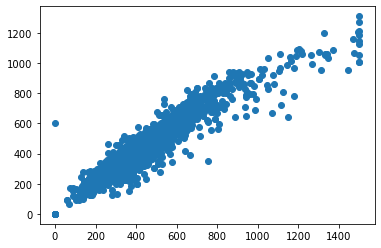

In [989]:
plt.scatter(x=hk_df['med_fam_income'], y=hk_df['avg_household_income'])
plt.show()

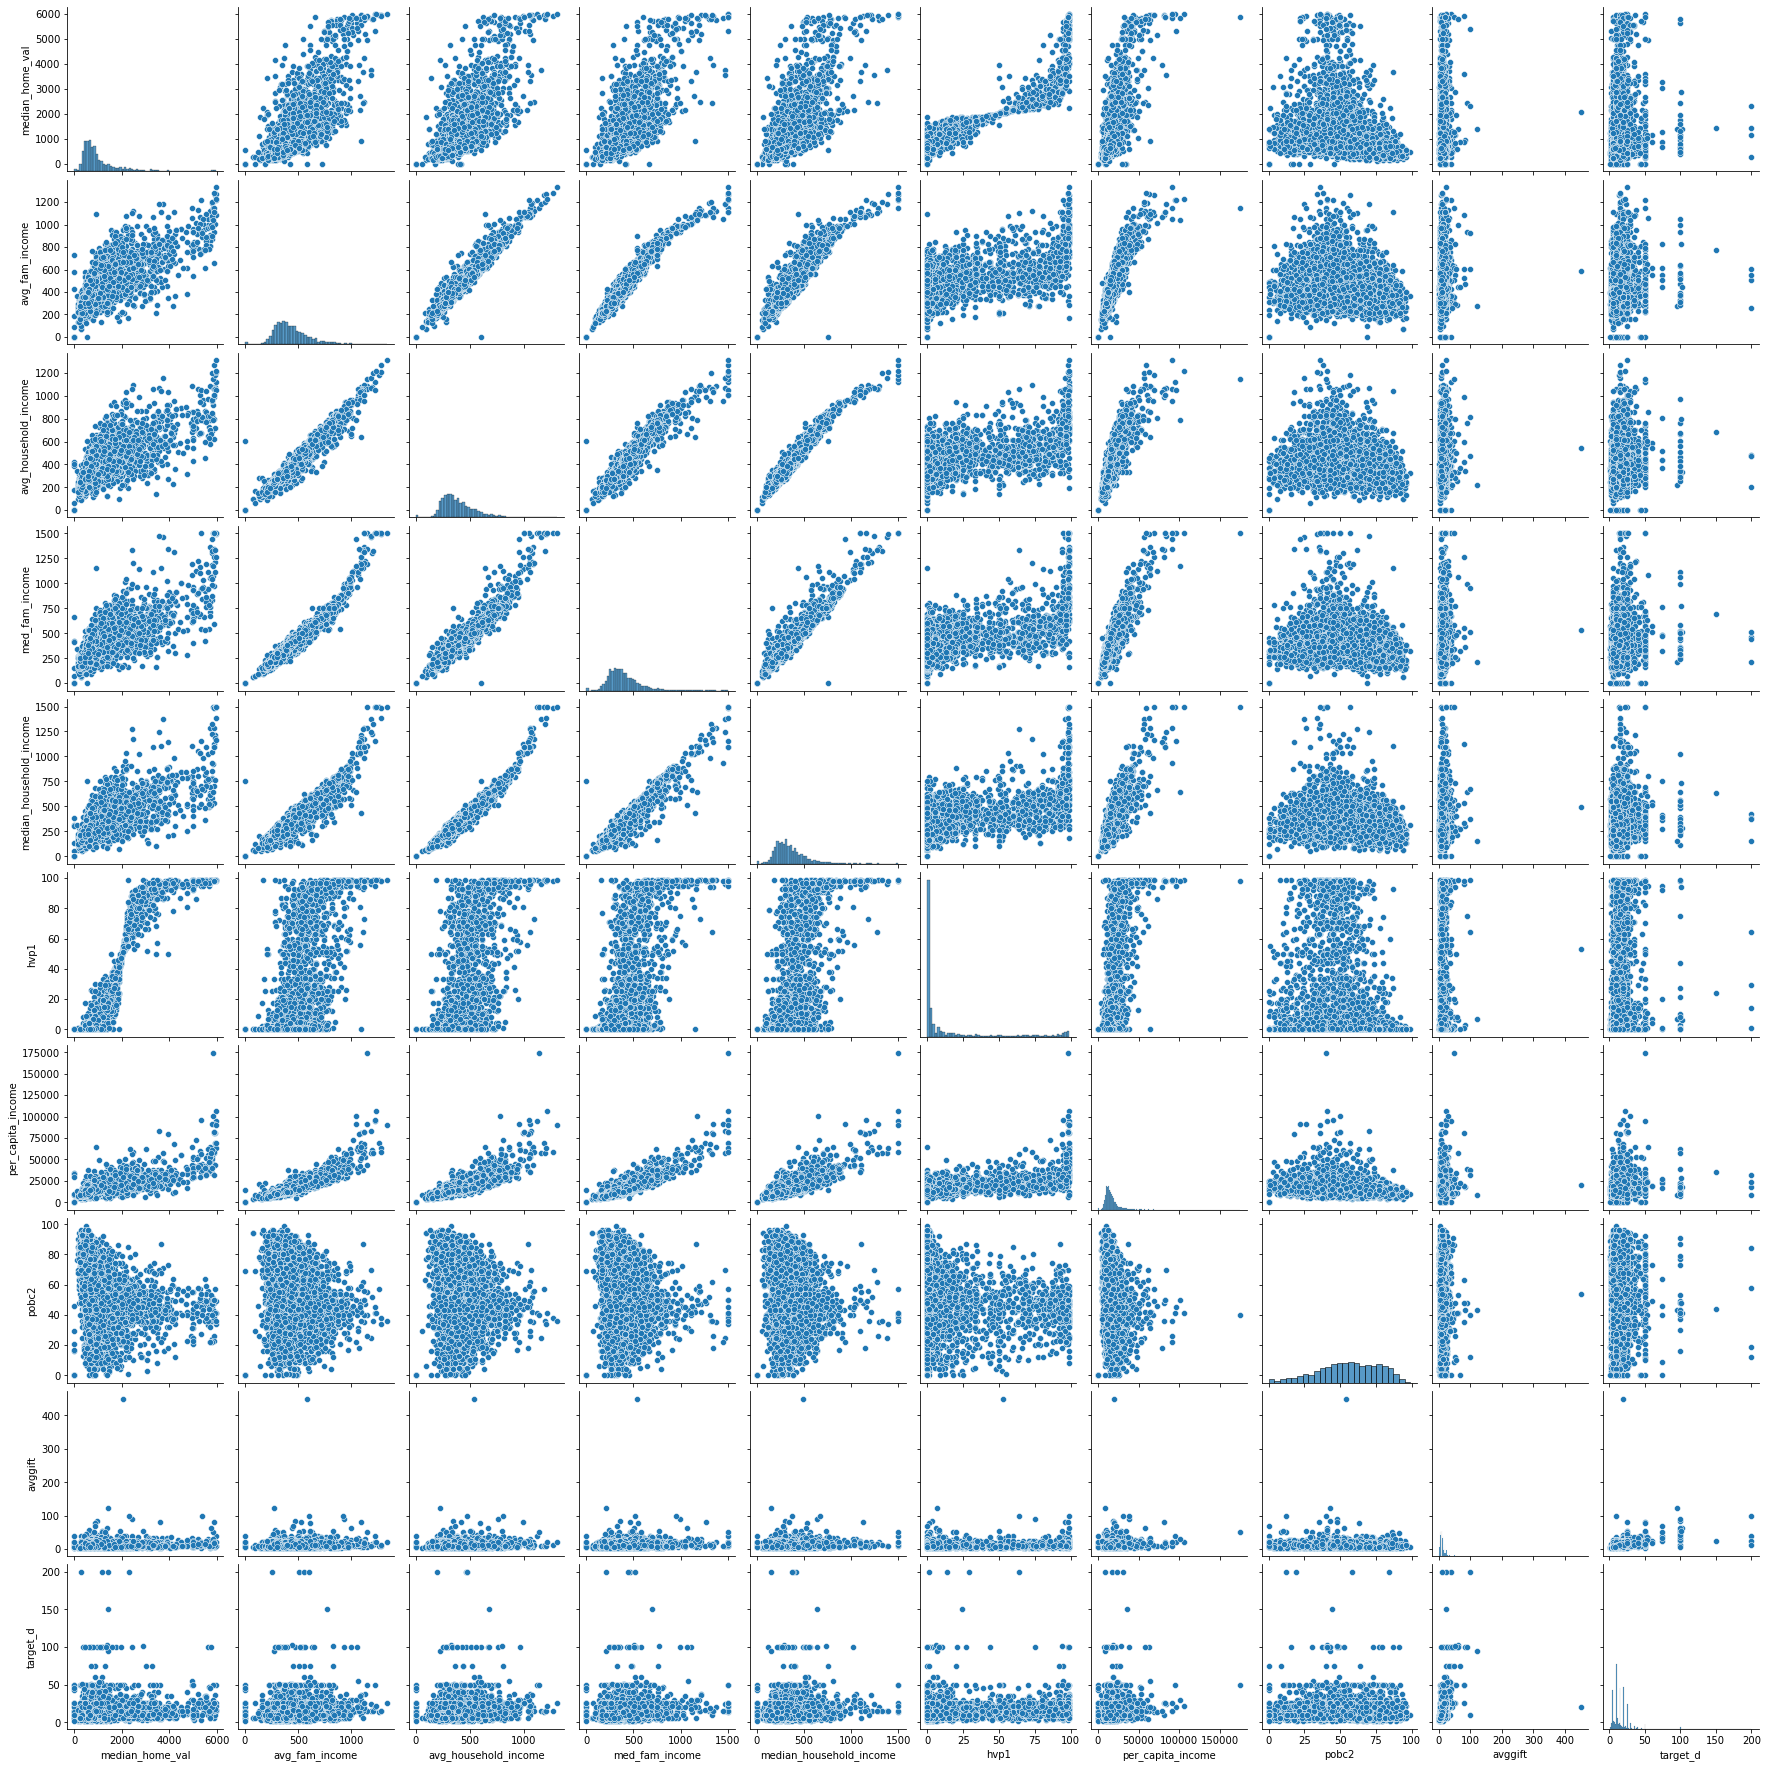

In [990]:
sns.pairplot(hk_df)

array([[<AxesSubplot:title={'center':'median_home_val'}>,
        <AxesSubplot:title={'center':'avg_fam_income'}>,
        <AxesSubplot:title={'center':'avg_household_income'}>],
       [<AxesSubplot:title={'center':'med_fam_income'}>,
        <AxesSubplot:title={'center':'median_household_income'}>,
        <AxesSubplot:title={'center':'hvp1'}>],
       [<AxesSubplot:title={'center':'per_capita_income'}>,
        <AxesSubplot:title={'center':'pobc2'}>,
        <AxesSubplot:title={'center':'avggift'}>],
       [<AxesSubplot:title={'center':'target_d'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

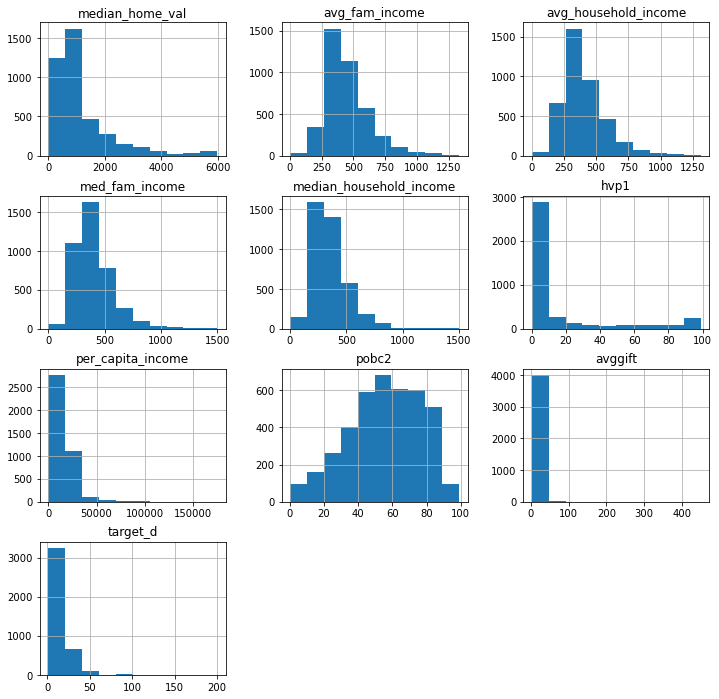

In [991]:
hk_df.hist(figsize=(12,12))

/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_home_val', ylabel='Density'>

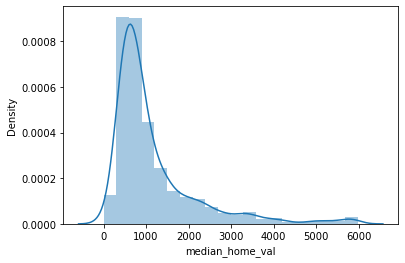

In [992]:
sns.distplot((hk_df['median_home_val']), bins=20)

In [993]:
hk_df

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,Male,1159.148591,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0
1,IL,Male,537.000000,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0
2,FL,Female,725.000000,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0
3,NC,Male,1159.148591,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0
4,FL,Female,995.000000,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,Female,742.000000,470.0,450,424.0,396,0,15356.0,37,14,S2,50.0
1002,FL,Male,599.000000,423.0,200,406.0,100,4,11670.0,27,9,C1,10.0
1003,ND,Male,593.000000,299.0,274,298.0,258,0,10186.0,70,5,S2,5.0
1004,WI,U,564.000000,397.0,295,386.0,217,0,12315.0,96,11,T2,14.0


<b>Power Transformer

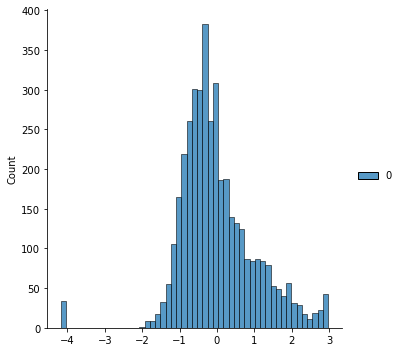

In [994]:
pt = PowerTransformer()
med_home_val_transformed=pt.fit_transform(hk_df['median_home_val'].to_numpy().reshape(-1,1))
sns.displot(median_transformed)

In [995]:
##crud
hk_df["med_home_val_transformed"]= med_home_val_transformed
hk_df.drop(["median_home_val"],axis=1,inplace=True)

In [996]:
hk_df

,state,gender,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d,med_home_val_transformed
0,FL,Male,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0,0.294846
1,IL,Male,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0,-0.636833
2,FL,Female,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0,-0.294111
3,NC,Male,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0,0.294846
4,FL,Female,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0,0.095725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,FL,Female,470.0,450,424.0,396,0,15356.0,37,14,S2,50.0,-0.266584
1002,FL,Male,423.0,200,406.0,100,4,11670.0,27,9,C1,10.0,-0.514993
1003,ND,Male,299.0,274,298.0,258,0,10186.0,70,5,S2,5.0,-0.526356
1004,WI,U,397.0,295,386.0,217,0,12315.0,96,11,T2,14.0,-0.582535


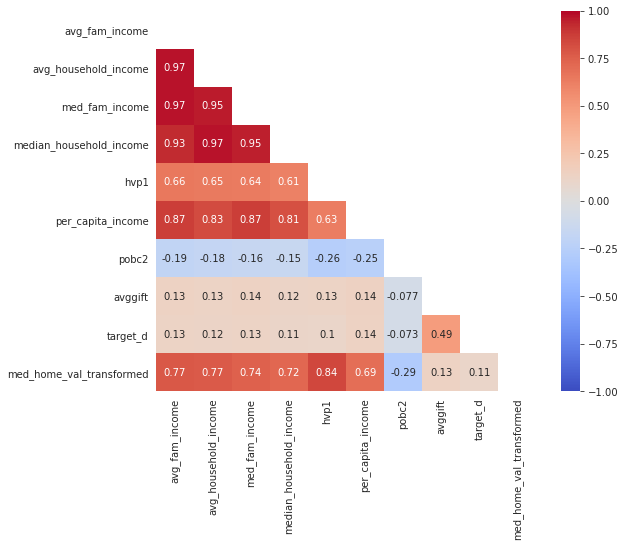

In [997]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Highly Correlated Columns

In [998]:
corr_matrix=hk_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['avg_household_income',
 'med_fam_income',
 'median_household_income',
 'per_capita_income',
 'med_home_val_transformed']

### dropping highly correlated features

In [999]:
hk_df.drop(["per_capita_income","hvp1","avg_household_income","median_household_income","med_fam_income"],axis=1,inplace=True)

In [1000]:
hk_df

,state,gender,avg_fam_income,pobc2,avggift,domain,target_d,med_home_val_transformed
0,FL,Male,520.0,16,28,C2,100.0,0.294846
1,IL,Male,473.0,89,5,T2,7.0,-0.636833
2,FL,Female,436.0,17,4,C2,5.0,-0.294111
3,NC,Male,413.0,74,27,T2,38.0,0.294846
4,FL,Female,348.0,6,6,C2,5.0,0.095725
...,...,...,...,...,...,...,...,...
1001,FL,Female,470.0,37,14,S2,50.0,-0.266584
1002,FL,Male,423.0,27,9,C1,10.0,-0.514993
1003,ND,Male,299.0,70,5,S2,5.0,-0.526356
1004,WI,U,397.0,96,11,T2,14.0,-0.582535


In [1001]:
hk_df.corr()

,avg_fam_income,pobc2,avggift,target_d,med_home_val_transformed
avg_fam_income,1.000000,-0.188200,0.133512,0.131467,0.774526
pobc2,-0.188200,1.000000,-0.076623,-0.073461,-0.290786
avggift,0.133512,-0.076623,1.000000,0.487661,0.132895
target_d,0.131467,-0.073461,0.487661,1.000000,0.109231
med_home_val_transformed,0.774526,-0.290786,0.132895,0.109231,1.000000


## Hot coding Categorical Variables 

In [1002]:
categoricals_features= hk_df.select_dtypes("object")
categoricals_features

,state,gender,domain
0,FL,Male,C2
1,IL,Male,T2
2,FL,Female,C2
3,NC,Male,T2
4,FL,Female,C2
...,...,...,...
1001,FL,Female,S2
1002,FL,Male,C1
1003,ND,Male,S2
1004,WI,U,T2


In [1003]:
hk_df.state.value_counts()
hk_df.gender.value_counts()
hk_df.domain.value_counts()

T2    551
S1    526
R2    496
S2    411
C2    359
C1    289
T1    218
U1    208
R3    198
C3    177
U2    117
U3     97
T3     72
0      68
S3     63
U4     62
R1     58
0      50
Name: domain, dtype: int64

In [1004]:
categorical_cols=pd.get_dummies(categoricals_features["gender"], drop_first=True)

In [1005]:
categorical_cols

,Male,U
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
1001,0,0
1002,1,0
1003,1,0
1004,0,1


### Predictive Modeling

<b> X Y split

In [1006]:
X=hk_df.drop('target_d', axis=1)
y=hk_df.target_d

In [1007]:
X=X._get_numeric_data()
X

,avg_fam_income,pobc2,avggift,med_home_val_transformed
0,520.0,16,28,0.294846
1,473.0,89,5,-0.636833
2,436.0,17,4,-0.294111
3,413.0,74,27,0.294846
4,348.0,6,6,0.095725
...,...,...,...,...
1001,470.0,37,14,-0.266584
1002,423.0,27,9,-0.514993
1003,299.0,70,5,-0.526356
1004,397.0,96,11,-0.582535


In [1008]:
#X=X.append(categorical_cols, ignore_index=True)

array([[<AxesSubplot:title={'center':'avg_fam_income'}>,
        <AxesSubplot:title={'center':'pobc2'}>],
       [<AxesSubplot:title={'center':'avggift'}>,
        <AxesSubplot:title={'center':'med_home_val_transformed'}>]],
      dtype=object)

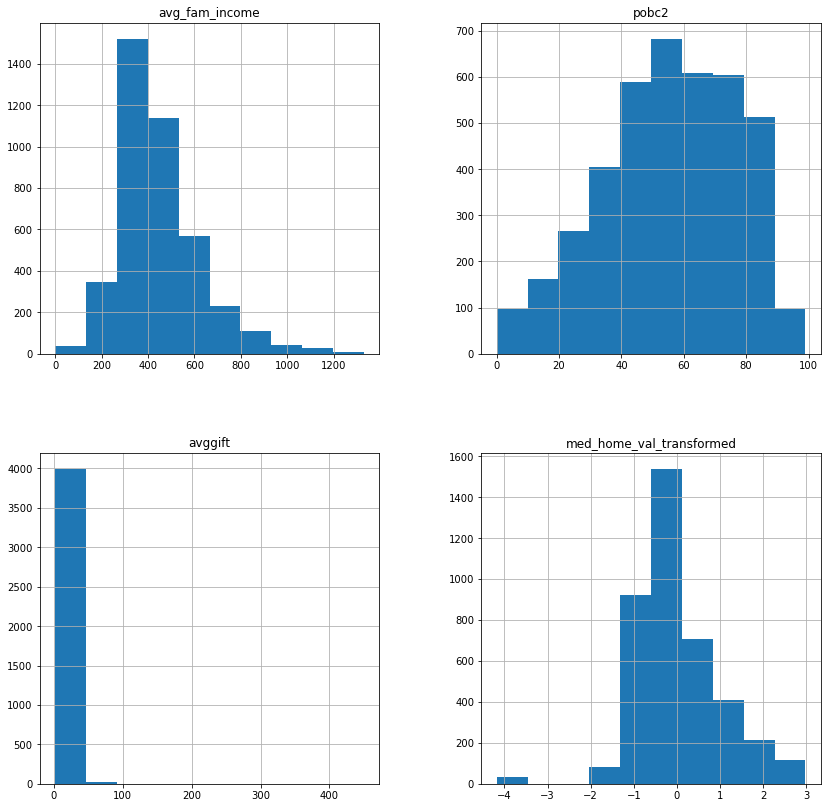

In [1009]:
X.hist(figsize=(14,14))

<b>Data Splitting

In [1067]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

<b> Standardize 

In [1068]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [1069]:
X_test_scaled=std_scaler.transform(X_test)

In [1070]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.71897043  1.66154024 -0.39208054 -0.77537059]
 [-0.62656524 -0.70762673 -0.39208054 -0.44419585]
 [ 0.68443342 -0.70762673 -0.30251851  1.22079047]
 ...
 [ 1.08870613 -1.07926076 -0.39208054  0.11184797]
 [-0.91533146  0.82536366 -0.21295648 -1.25659466]
 [ 0.91544639  1.24345195  0.3244157   0.18915193]]
--------
[[-0.88067952 -0.28953844 -0.57120461 -0.70072513]
 [ 0.04914772 -1.59025756 -0.66076664  0.1067388 ]
 [-0.83447692  0.40727538  1.220036   -0.45684691]
 ...
 [ 0.35523992 -1.12571501  0.14529164 -0.09122577]
 [-0.69586913  1.33636046 -0.30251851 -0.56400389]
 [-0.32624837 -2.10125435  0.3244157  -0.1042373 ]]


In [1071]:
hk_df

,state,gender,avg_fam_income,pobc2,avggift,domain,target_d,med_home_val_transformed
0,FL,Male,520.0,16,28,C2,100.0,0.294846
1,IL,Male,473.0,89,5,T2,7.0,-0.636833
2,FL,Female,436.0,17,4,C2,5.0,-0.294111
3,NC,Male,413.0,74,27,T2,38.0,0.294846
4,FL,Female,348.0,6,6,C2,5.0,0.095725
...,...,...,...,...,...,...,...,...
1001,FL,Female,470.0,37,14,S2,50.0,-0.266584
1002,FL,Male,423.0,27,9,C1,10.0,-0.514993
1003,ND,Male,299.0,70,5,S2,5.0,-0.526356
1004,WI,U,397.0,96,11,T2,14.0,-0.582535


## Apply Linear Regression

In [1048]:
X.columns

Index(['avg_fam_income', 'pobc2', 'avggift', 'med_home_val_transformed'], dtype='object')

### Modeling using Statsmodels

In [1049]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               target_d   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.84e-133
Time:                        13:20:32   Log-Likelihood:                -10818.
No. Observations:                2814   AIC:                         2.165e+04
Df Residuals:                    2809   BIC:                         2.168e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6660      0.213     73.430      0.0

In [1050]:
predictions_test

array([14.87667167, 22.51176909, 14.03858292, ..., 13.2353732 ,
       15.44112481, 19.00493673])

In [1051]:
#display adjusted R-squared
print(model.rsquared_adj)

0.19764091404862127


### Modeling using Scikit Learn

Model fitting

In [1052]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

<b> model parameters

In [1053]:
model.coef_

array([ 1.19569083, -0.63777317,  5.36823467, -0.38319797])

In [1054]:
model.intercept_

15.66597014925373

In [1055]:
model.score(X_test_scaled,y_test)

0.31568432359897913

Making prediction

In [1056]:
y_pred=model.predict(X_test_scaled)   # model prediction
##y_pred_train=model.predict(X_train)

In [1057]:
y_test

5       5.0
358    10.7
997    11.0
869    25.0
277    20.0
       ... 
527     7.0
73     10.0
65     12.0
993    10.0
294    20.0
Name: target_d, Length: 1206, dtype: float64

In [1058]:
y_pred

array([14.87667167, 22.51176909, 14.03858292, ..., 13.2353732 ,
       15.44112481, 19.00493673])

In [1059]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

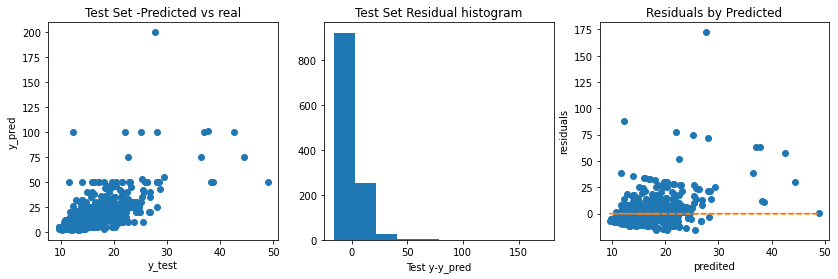

In [1060]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<b>more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

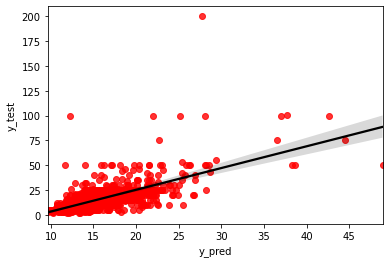

In [1061]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

<b> Error metrics

In [1062]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

111.99474481933716
6.085343561155498


In [1063]:
R2=r2_score(y_test,y_pred)
R2

0.31568432359897913

In [1064]:
X_test.shape[1]

4

In [1065]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.31340517063844286

#### Feature Importance

In [1072]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [1073]:
features_importances

,Attribute,Importance
2,avggift,5.368235
0,avg_fam_income,1.195691
1,pobc2,0.637773
3,med_home_val_transformed,0.383198


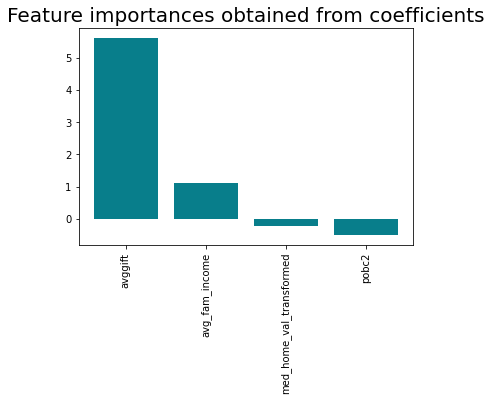

In [1031]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Write a csv

With `to_csv` 

In [ ]:
hk_df.to_csv("Data/healthcare_for_all_cleaned_data.csv")